In [2]:
import matplotlib.pyplot as plt
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 

In [40]:

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("../benchmark results/spark-8nodes-parallel-op.csv") 
# Preview the first 5 lines of the loaded data 
data = data.iloc[1:] # remove first line because of java warming up
data.head()

array size   create broadcast var time   parallel op time   total time  \
1        1000                          37                748          785   
2        1000                          35                671          706   
3        1000                          38                737          775   
4        1000                          25                655          680   
5        1000                          30                146          176   

    sum value  
1      499500  
2      499500  
3      499500  
4      499500  
5      499500

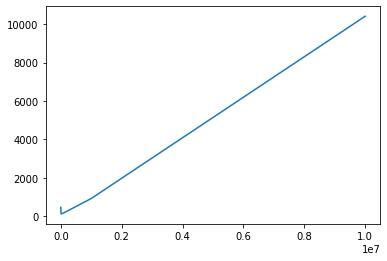

[467.44444444444446, 126.4, 180.4, 926.9, 10407.4, 407844.9]


In [42]:
avg = {}
totalTime = []
arraySize = []

for index, row in data.iterrows():
    avg[row["array size"]] = {}
    avg[row["array size"]]["count"] = 0
    avg[row["array size"]]["sum"] = 0
    
for index, row in data.iterrows():
    #print(row[" total time"])
    avg[row["array size"]]["count"]+= 1
    avg[row["array size"]]["sum"] += row[" total time"]
for index in avg:
    totalTime.append(avg[index]["sum"] / avg[index]["count"])
    arraySize.append(index)


plt.plot(arraySize, totalTime)
plt.show()
print(totalTime)